In [1]:
import numpy as np

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
option = 10
def f(x: float, y: float) -> float:
    a = 1.0 + 0.4 * (option - 5)
    b = 1.0 + 0.4 * (option - 5)
    return np.exp(-a*x) * (y**2 + b)


x0, y0 = 0.0, np.array([0.0])
xf = f(x0, y0)
x = 1
n = 10
h = (xf - x0) / n


def reset_parameters():
    global xf, x, n, h, x0, y0
    xf = f(x0, y0)
    x = 1
    n = 100
    h = (xf - x0) / n
    x0, y0 = 0.0, np.array([0.0]) #0.1, np.array([0.1])


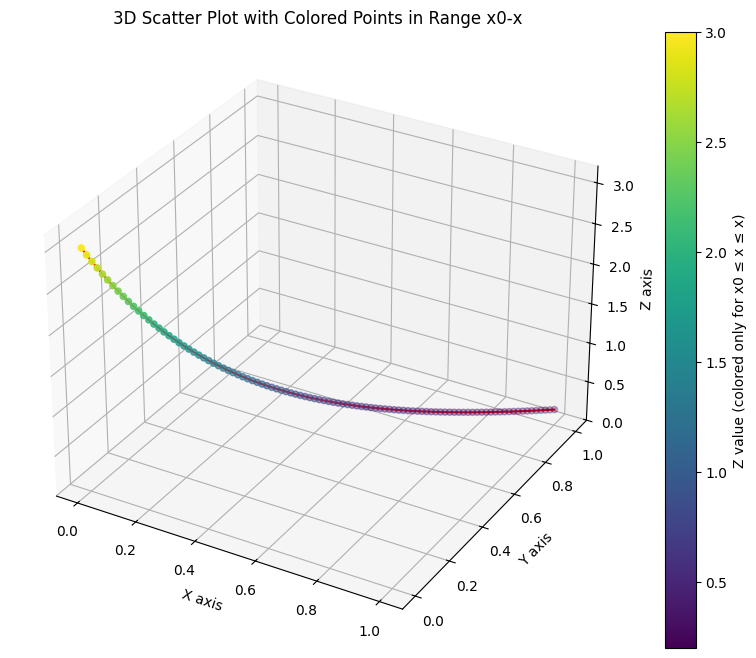

In [4]:
reset_parameters()
XPLOT = np.linspace(x0, x, n)
YPLOT = np.linspace(x0, x, n)
ZPLOT = f(XPLOT, YPLOT)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
mask = (XPLOT >= x0) & (XPLOT <= x)
colors = np.array([0.5 for i in range(ZPLOT.shape[0])])#np.zeros(ZPLOT.shape)
colors[mask] = ZPLOT[mask]
scatter = ax.scatter(XPLOT, YPLOT, ZPLOT, c=colors)
ax.plot(XPLOT, YPLOT, ZPLOT, color='r', alpha=1.0)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('3D Scatter Plot with Colored Points in Range x0-x')
cbar = plt.colorbar(scatter)
cbar.set_label('Z value (colored only for x0 ≤ x ≤ x)')
plt.show()

In [5]:
import numpy as np

def runge_kutta_4(f: callable, x0: float, y0: np.ndarray, xf: float, n: int) -> tuple[np.ndarray, np.ndarray]:
    h = (xf - x0) / n   
    x = np.linspace(x0, xf, n + 1)  
    y = np.zeros((n + 1, len(y0))) 
    y[0] = y0  

    for i in range(n):
        k1 = h * f(x[i], y[i])
        k2 = h * f(x[i] + h/2, y[i] + k1/2)
        k3 = h * f(x[i] + h/2, y[i] + k2/2)
        k4 = h * f(x[i] + h, y[i] + k3)

        y[i+1] = y[i] + (k1 + 2*k2 + 2*k3 + k4) / 6

        tau = np.max(np.abs((k2 - k3) / (k1 - k2 + 1e-15)))
        if tau > 0.1: 
            h /= 2
            print(f"Увага: tau = {float(tau):.4f} > 0.1 при x = {float(x[i+1]):.4f}")
    return x, y

def runge_rule(runge_kutta_4, f, x0, y0, xf, n, m):
    _, y_n = runge_kutta_4(f, x0, y0, xf, n)
    _, y_2n = runge_kutta_4(f, x0, y0, xf, 2*n)
    epsilon = np.max(np.abs(y_n[-1] - y_2n[-1])) / (2**m - 1)
    return epsilon


$$
y_{i+1}=y_i+\frac{h}{6}\left(K_1^{(i)}+2 K_2^{(i)}+2 K_3^{(i)}+K_4^{(i)}\right),
$$

де
$$
\begin{aligned}
K_1^{(i)} & =f\left(x_i, y_i\right), \\
K_2^{(i)} & =f\left(x_i+\frac{h}{2}, y_i+\frac{h K_1^{(i)}}{2}\right), \\
K_3^{(i)} & =f\left(x_i+\frac{h}{2}, y_i+\frac{h K_2^{(i)}}{2}\right), \\
K_4^{(i)} & =f\left(x_i+h, y_i+h K_3^{(i)}\right) .
\end{aligned}
$$

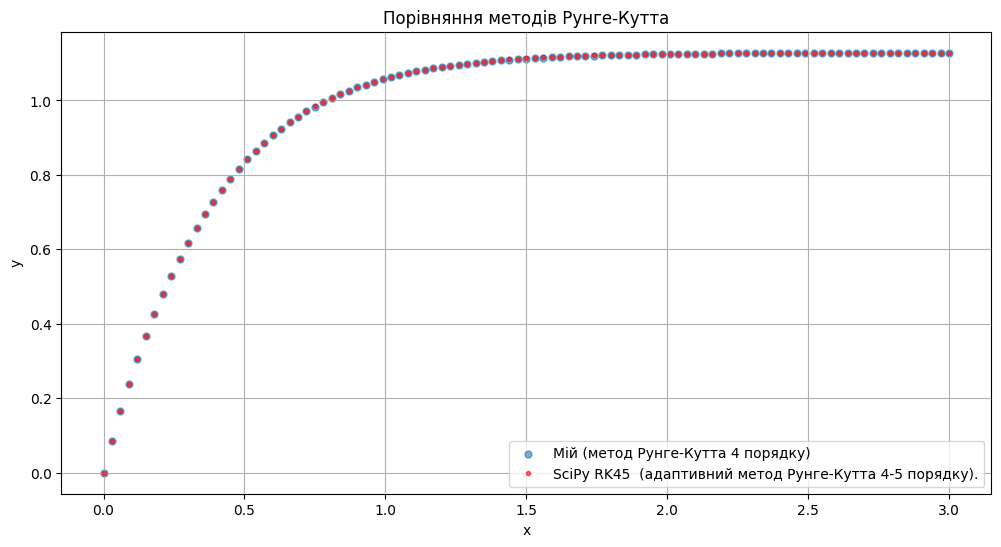

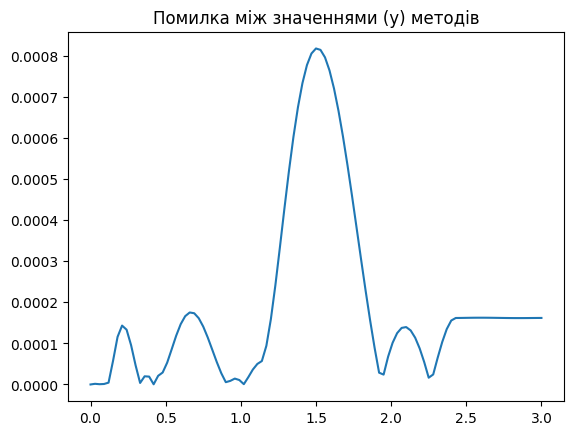

In [6]:
from scipy.integrate import solve_ivp

# Бібліотечна функція
reset_parameters()
sol = solve_ivp(f, [x0, xf], y0, method='RK45', t_eval=np.linspace(x0, xf, n+1).reshape(-1))

#  Помилка моєї функції 
reset_parameters()
error = runge_rule(runge_kutta_4, f, x0, y0, xf, n, 4)

reset_parameters()
x, y = runge_kutta_4(f, x0, y0, xf, n)

# Обчислення різниці між методами
max_diff = np.abs(y - sol.y.T)

# Побудова графіків
plt.figure(figsize=(12, 6))
plt.scatter(x, y, label='Мій (метод Рунге-Кутта 4 порядку)', s=25, alpha=0.6)
plt.plot(sol.t, sol.y.T, 'r.', label='SciPy RK45  (адаптивний метод Рунге-Кутта 4-5 порядку).', linewidth=2, alpha=0.6)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Порівняння методів Рунге-Кутта')
plt.legend()
plt.grid(True)
plt.show()

plt.plot(x,max_diff)
plt.title("Помилка між значеннями (у) методів")
plt.show()

In [7]:

def adams_method(f, x0, y0, xf, n):
    h = (xf - x0) / n  # крок
    x = np.linspace(x0, xf, n + 1)
    y = np.zeros(n + 1)
    y[0] = y0

    for i in range(3):
        k1 = h * f(x[i], y[i])
        k2 = h * f(x[i] + h/2, y[i] + k1/2)
        k3 = h * f(x[i] + h/2, y[i] + k2/2)
        k4 = h * f(x[i] + h, y[i] + k3)
        y[i+1] = y[i] + (k1 + 2*k2 + 2*k3 + k4) / 6

    for i in range(3, n):
        y_pred = y[i] + h/24 * (55*f(x[i], y[i]) - 59*f(x[i-1], y[i-1]) + 
                                37*f(x[i-2], y[i-2]) - 9*f(x[i-3], y[i-3]))

        y[i+1] = y[i] + h/24 * (9*f(x[i+1], y_pred) + 19*f(x[i], y[i]) - 
                                5*f(x[i-1], y[i-1]) + f(x[i-2], y[i-2]))

    return x, y

$$
\begin{aligned}
& y_{k+1}^{\text {excmp }}=y_k+\frac{h}{24}\left(55 f\left(x_k, y_k\right)-59 f\left(x_{k-1}, y_{k-1}\right)+37 f\left(x_{k-2}, y_{k-2}\right)-9 f\left(x_{k-3}, y_{k-3}\right)\right), \\
& y_{k+1}^{\text {inmep }}=y_k+\frac{h}{24}\left(9 f\left(x_{k+1}, y_{k+1}\right)+19 f\left(x_k, y_k\right)-5 f\left(x_{k-1}, y_{k-1}\right)+f\left(x_{k-2}, y_{k-2}\right)\right)
\end{aligned}
$$


   - $f(x_k, y_k)$ - це похідна в поточній точці
   - $f(x_{k-1}, y_{k-1})$ - похідна в попередній точці
   - $f(x_{k-2}, y_{k-2})$ - похідна в точці, що передує попередній
   - $f(x_{k-3}, y_{k-3})$ - похідна в точці, що передує попередній на два кроки

У формулі для $y_{k+1}^{\text{interp}}$ також є $f(x_{k+1}, y_{k+1})$ - це похідна в новій точці, яку ми обчислюємо, використовуючи прогнозоване значення $y_{k+1}$.


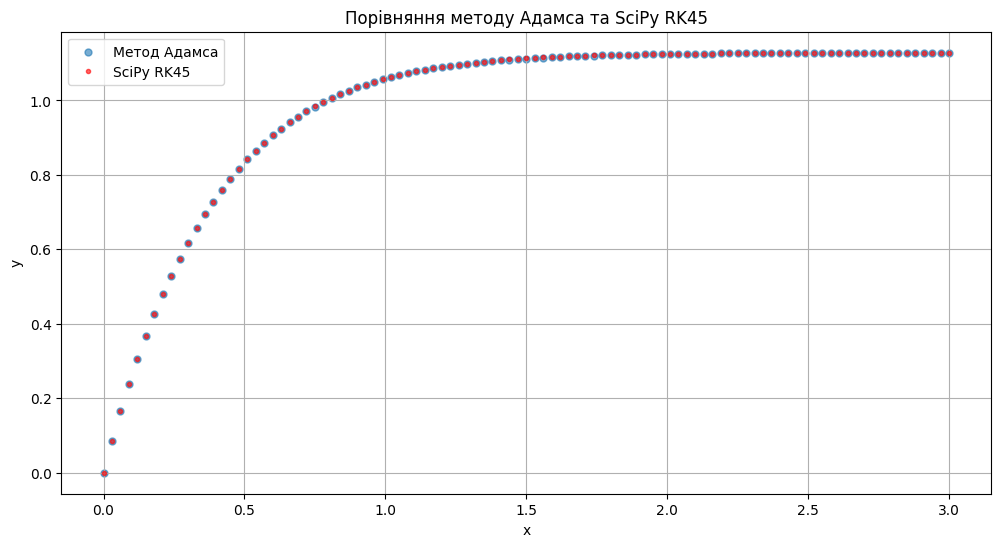

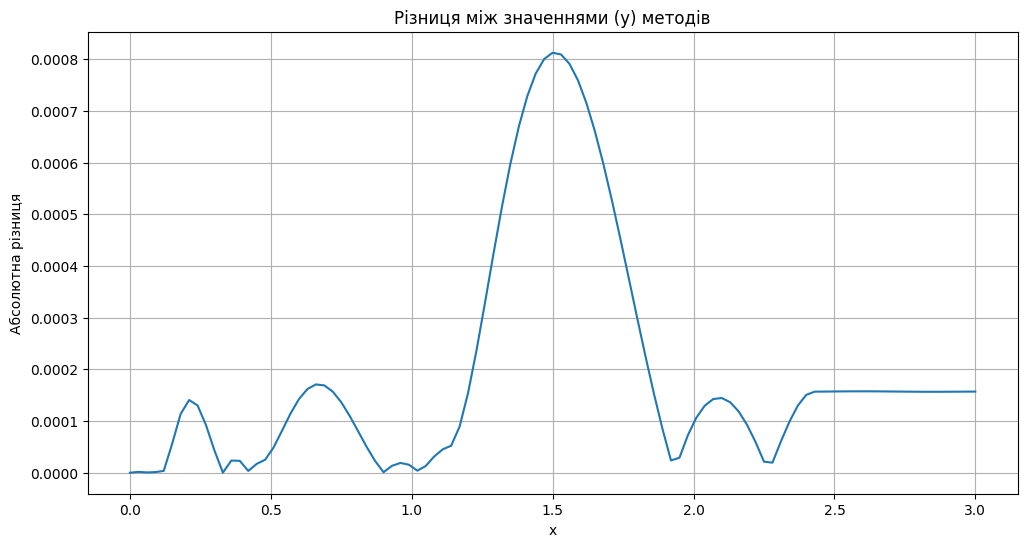

Максимальна різниця: 0.0008126440194968776


In [8]:

# Бібліотечна функція
reset_parameters()
sol = solve_ivp(f, [x0, xf], y0, method='RK45', t_eval=np.linspace(x0, xf, n+1).reshape(-1))

# Метод Адамса
reset_parameters()
x_adams, y_adams = adams_method(f, x0, y0, xf, n)

# Обчислення різниці між методами
max_diff = np.abs(y_adams - sol.y.T.flatten())

# Побудова графіків
plt.figure(figsize=(12, 6))
plt.scatter(x_adams, y_adams, label='Метод Адамса', s=25, alpha=0.6)
plt.plot(sol.t, sol.y.T, 'r.', label='SciPy RK45', linewidth=2, alpha=0.6)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Порівняння методу Адамса та SciPy RK45')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(x_adams, max_diff)
plt.title("Різниця між значеннями (y) методів")
plt.xlabel('x')
plt.ylabel('Абсолютна різниця')
plt.grid(True)
plt.show()

print(f"Максимальна різниця: {np.max(max_diff)}")

In [9]:
indices = np.linspace(0, len(x_adams) - 1, 10, dtype=int).tolist()
print(f"{'x value ':<13} | {'y adams':<13} | {'y runge-kutte-4':<15}")
for i in indices:
    print(f"{float(x_adams[i]):<13.6f} | {float(y_adams[i]):<13.6f} | {float(y[i]):<15.6f}")

x value       | y adams       | y runge-kutte-4
0.000000      | 0.000000      | 0.000000       
0.330000      | 0.657536      | 0.657532       
0.660000      | 0.940918      | 0.940914       
0.990000      | 1.056533      | 1.056528       
1.320000      | 1.101282      | 1.101278       
1.650000      | 1.118180      | 1.118175       
1.980000      | 1.124497      | 1.124492       
2.310000      | 1.126850      | 1.126845       
2.640000      | 1.127725      | 1.127720       
3.000000      | 1.128066      | 1.128061       


Система диференціальних рівнянь:
y0' = y1
y1' = -y0 + 0.0 * y1
Початкові умови: y0(0) = 0.1, y1(0) = 0.0
Відрізок: [0, 10]
Крок інтегрування: 0.01

x value       | y0 (RK4)      | y1 (RK4)      | y0 (RK45)     | y1 (RK45)    
---------------------------------------------------------------------------
0.000000      | 0.100000      | 0.000000      | 0.100000      | 0.000000     
1.110000      | 0.044466      | -0.089570     | 0.044468      | -0.089599    
2.220000      | -0.060455     | -0.079657     | -0.060502     | -0.079672    
3.330000      | -0.098230     | 0.018729      | -0.098247     | 0.018795     
4.440000      | -0.026903     | 0.096313      | -0.026804     | 0.096342     
5.550000      | 0.074305      | 0.066924      | 0.074399      | 0.066811     
6.660000      | 0.092984      | -0.036796     | 0.092915      | -0.036964    
7.770000      | 0.008388      | -0.099648     | 0.008172      | -0.099680    
8.880000      | -0.085524     | -0.051823     | -0.085671     | -0.051620 

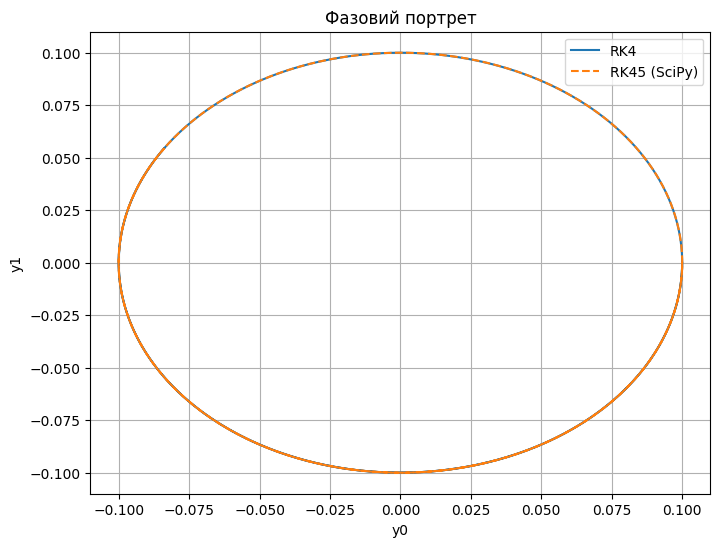

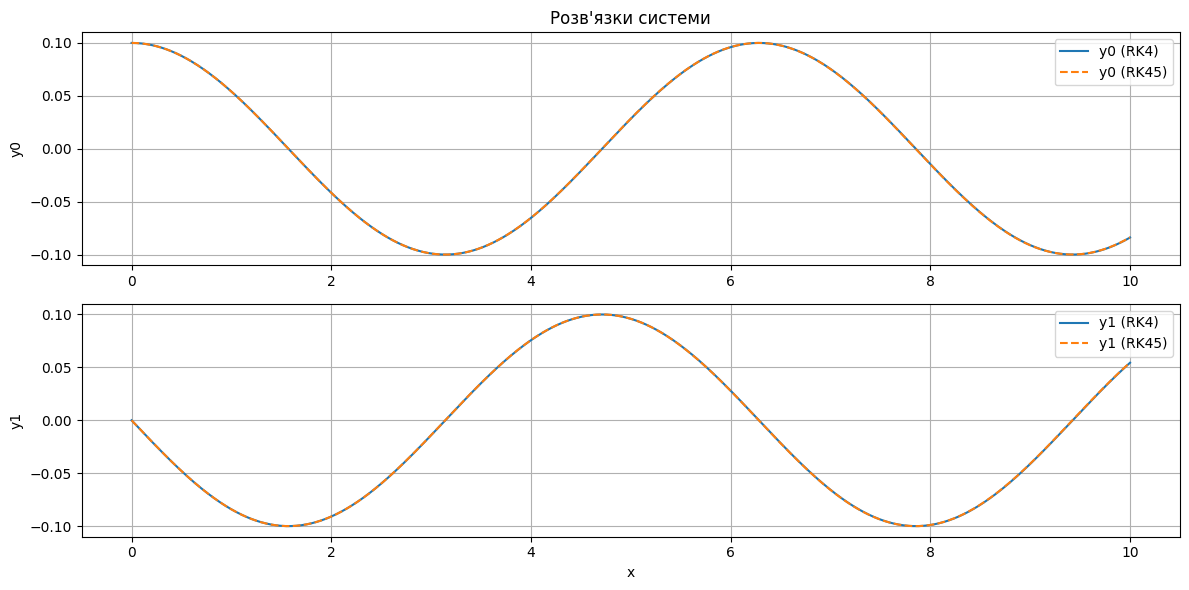

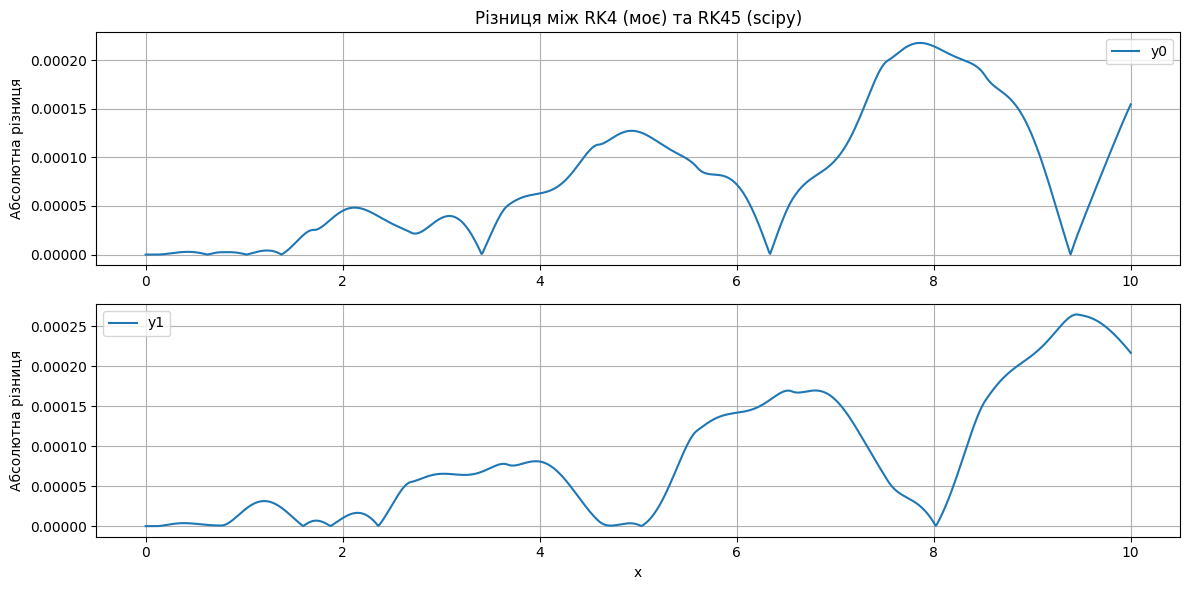

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

option = 10

def f2(x: float, y: np.ndarray) -> np.ndarray:
    y0, y1 = y
    return np.array([y1, -y0 + (option - 10)/10 * y1])

def runge_kutta_4(f, x0, y0, xf, n):
    h = (xf - x0) / n
    x = np.linspace(x0, xf, n+1)
    y = np.zeros((n+1, len(y0)))
    y[0] = y0

    for i in range(n):
        k1 = h * f(x[i], y[i])
        k2 = h * f(x[i] + h/2, y[i] + k1/2)
        k3 = h * f(x[i] + h/2, y[i] + k2/2)
        k4 = h * f(x[i] + h, y[i] + k3)
        y[i+1] = y[i] + (k1 + 2*k2 + 2*k3 + k4) / 6

    return x, y

x0, y0 = 0, np.array([0.1, 0.0])
xf = 10
n = 1000
h = (xf - x0) / n

print("Система диференціальних рівнянь:")
print("y0' = y1")
print(f"y1' = -y0 + {(option - 10)/10} * y1")
print(f"Початкові умови: y0(0) = {y0[0]}, y1(0) = {y0[1]}")
print(f"Відрізок: [{x0}, {xf}]")
print(f"Крок інтегрування: {h}")
print()

# Розв'язок методом Рунге-Кутта 4-го порядку
x_rk4, y_rk4 = runge_kutta_4(f2, x0, y0, xf, n)

# Розв'язок методом RK45 з SciPy
sol = solve_ivp(lambda t, y: f2(t, y), [x0, xf], y0, method='RK45', t_eval=np.linspace(x0, xf, n+1))

# Виведення таблиці значень
indices = np.linspace(0, len(x_rk4) - 1, 10, dtype=int).tolist()
print(f"{'x value':<13} | {'y0 (RK4)':<13} | {'y1 (RK4)':<13} | {'y0 (RK45)':<13} | {'y1 (RK45)':<13}")
print("-" * 75)
for i in indices:
    print(f"{x_rk4[i]:<13.6f} | {y_rk4[i, 0]:<13.6f} | {y_rk4[i, 1]:<13.6f} | {sol.y[0, i]:<13.6f} | {sol.y[1, i]:<13.6f}")
print()

# Фазовий портрет
plt.figure(figsize=(8, 6))
plt.plot(y_rk4[:, 0], y_rk4[:, 1], label='RK4')
plt.plot(sol.y[0], sol.y[1], '--', label='RK45 (SciPy)')
plt.xlabel('y0')
plt.ylabel('y1')
plt.title('Фазовий портрет')
plt.legend()
plt.grid()
plt.show()

# Графіки розв'язків
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(x_rk4, y_rk4[:, 0], label='y0 (RK4)')
plt.plot(sol.t, sol.y[0], '--', label='y0 (RK45)')
plt.ylabel('y0')
plt.title('Розв\'язки системи')
plt.legend()
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(x_rk4, y_rk4[:, 1], label='y1 (RK4)')
plt.plot(sol.t, sol.y[1], '--', label='y1 (RK45)')
plt.xlabel('x')
plt.ylabel('y1')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Порівняння методів
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(x_rk4, np.abs(y_rk4[:, 0] - sol.y[0]), label='y0')
plt.ylabel('Абсолютна різниця')
plt.title('Різниця між RK4 (моє) та RK45 (scipy)')
plt.legend()
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(x_rk4, np.abs(y_rk4[:, 1] - sol.y[1]), label='y1')
plt.xlabel('x')
plt.ylabel('Абсолютна різниця')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()